## Use Folder Dataset (for Custom Datasets) via API

Here we show how one can utilize custom datasets to train anomalib models. A custom dataset in this model can be of the following types:

- A dataset with good and bad images.
- A dataset with good and bad images as well as mask ground-truths for pixel-wise evaluation.
- A dataset with good and bad images that is already split into training and testing sets.

To experiment this setting we provide a toy dataset that could be downloaded from the following [https://github.com/openvinotoolkit/anomalib/blob/main/docs/source/data/hazelnut_toy.zip](link). For the rest of the tutorial, we assume that the dataset is downloaded and extracted to `../../datasets`, located in the `anomalib` directory.

In [1]:
import numpy as np
from PIL import Image
from torchvision.transforms import ToPILImage

from anomalib.data.folder import Folder, FolderDataset
from anomalib.data.utils import InputNormalizationMethod, get_transforms

/home/user/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Torch Dataset

In [2]:
FolderDataset??

To create `FolderDataset` we need to create the albumentations object that applies transforms to the input image.

In [3]:
get_transforms??

In [4]:
image_size = (256, 256)
transform = get_transforms(image_size=256, normalization=InputNormalizationMethod.NONE)

#### Classification Task

In [5]:
folder_dataset_classification_train = FolderDataset(
    normal_dir="../../datasets/hazelnut_toy/good",
    abnormal_dir="../../datasets/hazelnut_toy/crack",
    split="train",
    transform=transform,
    task="classification",
)
folder_dataset_classification_train.setup()
folder_dataset_classification_train.samples.head()

,image_path,label,mask_path,label_index,split
0,/home/user/datasets/hazelnut_toy/good/00.jpg,normal,,0,train
1,/home/user/datasets/hazelnut_toy/good/01.jpg,normal,,0,train
2,/home/user/datasets/hazelnut_toy/good/02.jpg,normal,,0,train
3,/home/user/datasets/hazelnut_toy/good/03.jpg,normal,,0,train
4,/home/user/datasets/hazelnut_toy/good/04.jpg,normal,,0,train


Let's look at the first sample in the dataset.

In [6]:
data = folder_dataset_classification_train[0]
data.keys(), data["image"].shape

(dict_keys(['image_path', 'label', 'image']), torch.Size([3, 256, 256]))

As can be seen above, when we choose `classification` task and `train` split, the dataset only returns `image`. This is mainly because training only requires normal images and no labels. Now let's try `test` split for the `classification` task

In [7]:
# Folder Classification Test Set
folder_dataset_classification_test = FolderDataset(
    normal_dir="../../datasets/hazelnut_toy/good",
    abnormal_dir="../../datasets/hazelnut_toy/crack",
    split="test",
    transform=transform,
    task="classification",
)
folder_dataset_classification_test.setup()
folder_dataset_classification_test.samples.head()

,image_path,label,mask_path,label_index,split
0,/home/user/datasets/hazelnut_toy/crack/01.jpg,abnormal,,1,test
1,/home/user/datasets/hazelnut_toy/crack/02.jpg,abnormal,,1,test
2,/home/user/datasets/hazelnut_toy/crack/03.jpg,abnormal,,1,test
3,/home/user/datasets/hazelnut_toy/crack/04.jpg,abnormal,,1,test
4,/home/user/datasets/hazelnut_toy/crack/05.jpg,abnormal,,1,test


In [8]:
data = folder_dataset_classification_test[0]
data.keys(), data["image"].shape, data["image_path"], data["label"]

(dict_keys(['image_path', 'label', 'image']),
 torch.Size([3, 256, 256]),
 '/home/user/datasets/hazelnut_toy/crack/01.jpg',
 1)

#### Segmentation Task

It is also possible to configure the Folder dataset for the segmentation task, where the dataset object returns image and ground-truth mask.

In [9]:
# Folder Segmentation Train Set
folder_dataset_segmentation_train = FolderDataset(
    normal_dir="../../datasets/hazelnut_toy/good",
    abnormal_dir="../../datasets/hazelnut_toy/crack",
    split="train",
    transform=transform,
    mask_dir="../../datasets/hazelnut_toy/mask/crack",
    task="segmentation",
)
folder_dataset_segmentation_train.setup()
folder_dataset_segmentation_train.samples.head()

,image_path,label,mask_path,label_index,split
0,/home/user/datasets/hazelnut_toy/good/00.jpg,normal,,0,train
1,/home/user/datasets/hazelnut_toy/good/01.jpg,normal,,0,train
2,/home/user/datasets/hazelnut_toy/good/02.jpg,normal,,0,train
3,/home/user/datasets/hazelnut_toy/good/03.jpg,normal,,0,train
4,/home/user/datasets/hazelnut_toy/good/04.jpg,normal,,0,train


In [10]:
# Folder Segmentation Test Set
folder_dataset_segmentation_test = FolderDataset(
    normal_dir="../../datasets/hazelnut_toy/good",
    abnormal_dir="../../datasets/hazelnut_toy/crack",
    split="test",
    transform=transform,
    mask_dir="../../datasets/hazelnut_toy/mask/crack",
    task="segmentation",
)
folder_dataset_segmentation_test.setup()
folder_dataset_segmentation_test.samples.head(10)

,image_path,label,mask_path,label_index,split
0,/home/user/datasets/hazelnut_toy/crack/01.jpg,abnormal,/home/user/datasets/hazelnut_toy/mask/crack/01...,1,test
1,/home/user/datasets/hazelnut_toy/crack/02.jpg,abnormal,/home/user/datasets/hazelnut_toy/mask/crack/02...,1,test
2,/home/user/datasets/hazelnut_toy/crack/03.jpg,abnormal,/home/user/datasets/hazelnut_toy/mask/crack/03...,1,test
3,/home/user/datasets/hazelnut_toy/crack/04.jpg,abnormal,/home/user/datasets/hazelnut_toy/mask/crack/04...,1,test
4,/home/user/datasets/hazelnut_toy/crack/05.jpg,abnormal,/home/user/datasets/hazelnut_toy/mask/crack/05...,1,test


In [11]:
data = folder_dataset_segmentation_test[3]
data.keys(), data["image"].shape, data["mask"].shape

(dict_keys(['image_path', 'label', 'image', 'mask_path', 'mask']),
 torch.Size([3, 256, 256]),
 torch.Size([256, 256]))

Let's visualize the image and the mask...

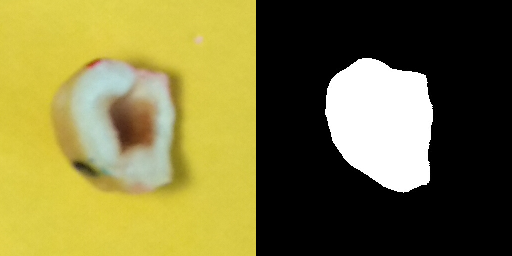

In [12]:
img = ToPILImage()(data["image"].clone())
msk = ToPILImage()(data["mask"]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

### DataModule

So far, we have shown the Torch Dataset implementation of Folder dataset. This is quite useful to get a sample. However, when we train models end-to-end fashion, we do need much more than this such as downloading the dataset, creating train/val/test/inference dataloaders. To handle all these, we have the PyTorch Lightning DataModule implementation, which is shown below

In [13]:
folder_datamodule = Folder(
    root="../../datasets/hazelnut_toy/",
    normal_dir="good",
    abnormal_dir="crack",
    task="segmentation",
    mask_dir="../../datasets/hazelnut_toy/mask/crack",
    image_size=256,
    normalization=InputNormalizationMethod.NONE,
)
folder_datamodule.setup()

In [14]:
# Train images
i, data = next(enumerate(folder_datamodule.train_dataloader()))
data.keys(), data["image"].shape

(dict_keys(['image_path', 'label', 'image', 'mask_path', 'mask']),
 torch.Size([28, 3, 256, 256]))

In [15]:
# Test images
i, data = next(enumerate(folder_datamodule.test_dataloader()))
data.keys(), data["image"].shape, data["mask"].shape

(dict_keys(['image_path', 'label', 'image', 'mask_path', 'mask']),
 torch.Size([6, 3, 256, 256]),
 torch.Size([6, 256, 256]))

As can be seen above, creating the dataloaders are pretty straghtforward, which could be directly used for training/testing/inference. We could visualize samples from the dataloaders as well.

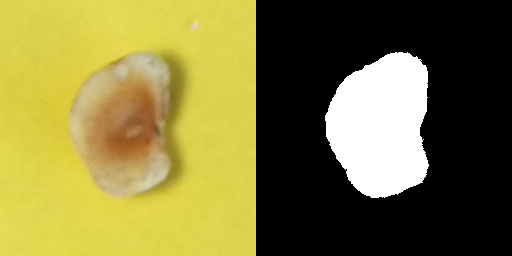

In [16]:
img = ToPILImage()(data["image"][0].clone())
msk = ToPILImage()(data["mask"][0]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

`Folder` data module offers much more flexibility cater all different sorts of needs. Please refer to the documentation for more details.